<a href="https://colab.research.google.com/github/jasanchez19/Machine-Learning-SVM-and-SVR-models/blob/main/Homework4JorgeSanchezECGR4105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 4

Problem 1

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

In [33]:
cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_input = pd.DataFrame(cancer_data)
cancer_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
cancer_labels = cancer.target
cancer_labels.shape


(569,)

In [35]:
labels = np.reshape(cancer_labels, (569,1))
final_cancer_data = np.concatenate([cancer_data,labels],axis=1)
final_cancer_data.shape


(569, 31)

In [36]:
cancer_dataset = pd.DataFrame(final_cancer_data)
features = cancer.feature_names
features_labels = np.append(features, 'label')
cancer_dataset.columns = features_labels
cancer_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [37]:
cancer_dataset['label'].replace(0, 'Benign', inplace=True)
cancer_dataset['label'].replace(1, 'Malignant', inplace=True)
cancer_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [38]:
cancer_X = cancer_dataset.iloc[:,0:29].values
cancer_Y = cancer_dataset.iloc[:,30].values
cancer_X_train, cancer_X_test, cancer_Y_train, cancer_Y_test = train_test_split(cancer_X, cancer_Y, test_size=0.2, random_state=42)

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'] 

x = cancer_dataset.loc[:, features].values 
y = cancer_dataset.loc[:,['label']].values  
x = StandardScaler().fit_transform(x) 

In [39]:
from sklearn.decomposition import PCA 
sc_X = StandardScaler()
cancer_X_trainstd = sc_X.fit_transform(cancer_X_train)
cancer_X_teststd = sc_X.transform(cancer_X_test)

SVM_Linear = SVC(kernel = 'linear', C= 1E3)
columns = []
SVMLinaccuracy = np.zeros(30)
SVMLinPrecision = np.zeros(30)
SVMLinRecall = np.zeros(30)
for i in range(1,30):
    pca = PCA(n_components=i)
    columns = np.append(columns, ['principal component ' + str(i)])
    columns = list(columns)
    principalComponentstrain = pca.fit_transform(cancer_X_trainstd) 
    principalDftrain = pd.DataFrame(data = principalComponentstrain, columns = columns)

    finalDftrain = pd.concat([principalDftrain, cancer_dataset[['label']]], axis = 1)
    principalComponentstest = pca.fit_transform(cancer_X_teststd) 
    principalDftest = pd.DataFrame(data = principalComponentstest, columns = columns)
    finalDftest = pd.concat([principalDftest, cancer_dataset[['label']]], axis = 1)
    SVM_Linear_train = SVM_Linear.fit(principalDftrain.values, cancer_Y_train)
    cancer_Y_predSVMLIN = SVM_Linear_train.predict(principalDftest.values)
    print("Accuracy " + str(i) + ":",metrics.accuracy_score(cancer_Y_test, cancer_Y_predSVMLIN))
    SVMLinaccuracy[i] = metrics.accuracy_score(cancer_Y_test, cancer_Y_predSVMLIN)
    print("Precision " + str(i) + ":", metrics.precision_score(cancer_Y_test, cancer_Y_predSVMLIN, pos_label="Benign"))
    SVMLinPrecision[i] = metrics.precision_score(cancer_Y_test, cancer_Y_predSVMLIN, pos_label="Benign")
    print("Recall " + str(i) + ":",metrics.recall_score(cancer_Y_test, cancer_Y_predSVMLIN, pos_label="Benign"))
    SVMLinRecall[i] = metrics.recall_score(cancer_Y_test, cancer_Y_predSVMLIN, pos_label="Benign")
    columns = np.array(columns)

Accuracy 1: 0.9385964912280702
Precision 1: 0.9736842105263158
Recall 1: 0.8604651162790697
Accuracy 2: 0.9736842105263158
Precision 2: 0.9761904761904762
Recall 2: 0.9534883720930233
Accuracy 3: 0.9649122807017544
Precision 3: 1.0
Recall 3: 0.9069767441860465
Accuracy 4: 0.9473684210526315
Precision 4: 0.9512195121951219
Recall 4: 0.9069767441860465
Accuracy 5: 0.9122807017543859
Precision 5: 0.8666666666666667
Recall 5: 0.9069767441860465
Accuracy 6: 0.9385964912280702
Precision 6: 0.9090909090909091
Recall 6: 0.9302325581395349
Accuracy 7: 0.9385964912280702
Precision 7: 0.9090909090909091
Recall 7: 0.9302325581395349
Accuracy 8: 0.9122807017543859
Precision 8: 0.8367346938775511
Recall 8: 0.9534883720930233
Accuracy 9: 0.9473684210526315
Precision 9: 0.9111111111111111
Recall 9: 0.9534883720930233
Accuracy 10: 0.9298245614035088
Precision 10: 0.8723404255319149
Recall 10: 0.9534883720930233
Accuracy 11: 0.9298245614035088
Precision 11: 0.8571428571428571
Recall 11: 0.97674418604651

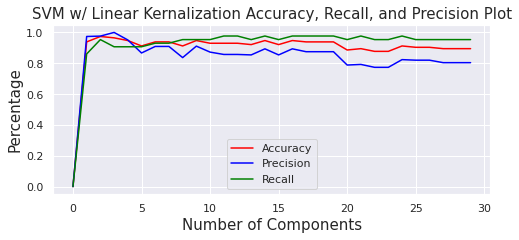

In [40]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x = np.array(range(0,30))
y = SVMLinaccuracy
z = SVMLinPrecision
v = SVMLinRecall
plt.title("SVM w/ Linear Kernalization Accuracy, Recall, and Precision Plot", fontsize = 15)
plt.plot(x, y, color="red", label="Accuracy")
plt.plot(x, z, color="blue", label="Precision")
plt.plot(x, v, color="green", label="Recall")
plt.xlabel('Number of Components', fontsize = 15) 
plt.ylabel('Percentage', fontsize = 15) 
leg = plt.legend(loc = 'lower center')
plt.show()

In [41]:
SVM_Polyv1 = SVC(kernel = 'poly', C= 1E3, degree = 1)
columns = []
SVMPv1accuracy = np.zeros(30)
SVMPv1Precision = np.zeros(30)
SVMPv1Recall = np.zeros(30)
for i in range(1,30):
    pca = PCA(n_components=i)
    columns = np.append(columns, ['principal component ' + str(i)])
    columns = list(columns)
    principalComponentstrain = pca.fit_transform(cancer_X_trainstd) 
    principalDftrain = pd.DataFrame(data = principalComponentstrain, columns = columns)

    finalDftrain = pd.concat([principalDftrain, cancer_dataset[['label']]], axis = 1)
    principalComponentstest = pca.fit_transform(cancer_X_teststd) 
    principalDftest = pd.DataFrame(data = principalComponentstest, columns = columns)
    finalDftest = pd.concat([principalDftest, cancer_dataset[['label']]], axis = 1)
    SVM_Polyv1_train = SVM_Polyv1.fit(principalDftrain.values, cancer_Y_train)
    cancer_Y_predSVMPv1 = SVM_Polyv1_train.predict(principalDftest.values)
    print("Accuracy " + str(i) + ":",metrics.accuracy_score(cancer_Y_test, cancer_Y_predSVMPv1))
    SVMPv1accuracy[i] = metrics.accuracy_score(cancer_Y_test, cancer_Y_predSVMPv1)
    print("Precision " + str(i) + ":", metrics.precision_score(cancer_Y_test, cancer_Y_predSVMPv1, pos_label="Benign"))
    SVMPv1Precision[i] = metrics.precision_score(cancer_Y_test, cancer_Y_predSVMPv1, pos_label="Benign")
    print("Recall " + str(i) + ":",metrics.recall_score(cancer_Y_test, cancer_Y_predSVMPv1, pos_label="Benign"))
    SVMPv1Recall[i] = metrics.recall_score(cancer_Y_test, cancer_Y_predSVMPv1, pos_label="Benign")
    columns = np.array(columns)

Accuracy 1: 0.9385964912280702
Precision 1: 0.9736842105263158
Recall 1: 0.8604651162790697
Accuracy 2: 0.9736842105263158
Precision 2: 0.9761904761904762
Recall 2: 0.9534883720930233
Accuracy 3: 0.9649122807017544
Precision 3: 1.0
Recall 3: 0.9069767441860465
Accuracy 4: 0.9473684210526315
Precision 4: 0.9512195121951219
Recall 4: 0.9069767441860465
Accuracy 5: 0.9122807017543859
Precision 5: 0.8666666666666667
Recall 5: 0.9069767441860465
Accuracy 6: 0.9385964912280702
Precision 6: 0.9090909090909091
Recall 6: 0.9302325581395349
Accuracy 7: 0.9385964912280702
Precision 7: 0.9090909090909091
Recall 7: 0.9302325581395349
Accuracy 8: 0.9122807017543859
Precision 8: 0.8367346938775511
Recall 8: 0.9534883720930233
Accuracy 9: 0.9473684210526315
Precision 9: 0.9111111111111111
Recall 9: 0.9534883720930233
Accuracy 10: 0.9298245614035088
Precision 10: 0.8723404255319149
Recall 10: 0.9534883720930233
Accuracy 11: 0.9298245614035088
Precision 11: 0.8571428571428571
Recall 11: 0.97674418604651

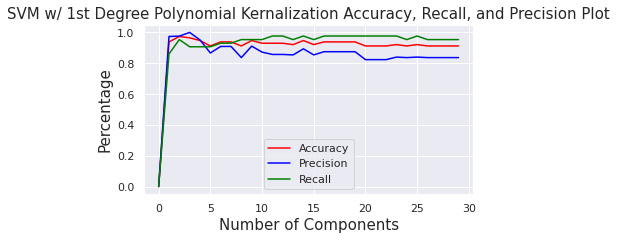

In [42]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x = np.array(range(0,30))
y = SVMPv1accuracy
z = SVMPv1Precision
v = SVMPv1Recall
plt.title("SVM w/ 1st Degree Polynomial Kernalization Accuracy, Recall, and Precision Plot", fontsize = 15)
plt.plot(x, y, color="red", label="Accuracy")
plt.plot(x, z, color="blue", label="Precision")
plt.plot(x, v, color="green", label="Recall")
plt.xlabel('Number of Components', fontsize = 15) 
plt.ylabel('Percentage', fontsize = 15) 
leg = plt.legend(loc = 'lower center')
plt.show()

In [43]:
SVM_Polyv2 = SVC(kernel = 'poly', C= 1E3, degree = 2)
columns = []
SVMPv2accuracy = np.zeros(30)
SVMPv2Precision = np.zeros(30)
SVMPv2Recall = np.zeros(30)
for i in range(1,30):
    pca = PCA(n_components=i)
    columns = np.append(columns, ['principal component ' + str(i)])
    columns = list(columns)
    principalComponentstrain = pca.fit_transform(cancer_X_trainstd) 
    principalDftrain = pd.DataFrame(data = principalComponentstrain, columns = columns)

    finalDftrain = pd.concat([principalDftrain, cancer_dataset[['label']]], axis = 1)
    principalComponentstest = pca.fit_transform(cancer_X_teststd) 
    principalDftest = pd.DataFrame(data = principalComponentstest, columns = columns)
    finalDftest = pd.concat([principalDftest, cancer_dataset[['label']]], axis = 1)
    SVM_Polyv2_train = SVM_Polyv2.fit(principalDftrain.values, cancer_Y_train)
    cancer_Y_predSVMPv2 = SVM_Polyv2_train.predict(principalDftest.values)
    print("Accuracy " + str(i) + ":",metrics.accuracy_score(cancer_Y_test, cancer_Y_predSVMPv2))
    SVMPv2accuracy[i] = metrics.accuracy_score(cancer_Y_test, cancer_Y_predSVMPv2)
    print("Precision " + str(i) + ":", metrics.precision_score(cancer_Y_test, cancer_Y_predSVMPv2, pos_label="Benign"))
    SVMPv2Precision[i] = metrics.precision_score(cancer_Y_test, cancer_Y_predSVMPv2, pos_label="Benign")
    print("Recall " + str(i) + ":",metrics.recall_score(cancer_Y_test, cancer_Y_predSVMPv2, pos_label="Benign"))
    SVMPv2Recall[i] = metrics.recall_score(cancer_Y_test, cancer_Y_predSVMPv2, pos_label="Benign")
    columns = np.array(columns)

Accuracy 1: 0.7368421052631579
Precision 1: 0.8823529411764706
Recall 1: 0.3488372093023256
Accuracy 2: 0.7280701754385965
Precision 2: 0.8
Recall 2: 0.37209302325581395
Accuracy 3: 0.6491228070175439
Precision 3: 0.5483870967741935
Recall 3: 0.3953488372093023
Accuracy 4: 0.631578947368421
Precision 4: 0.5135135135135135
Recall 4: 0.4418604651162791
Accuracy 5: 0.5964912280701754
Precision 5: 0.4634146341463415
Recall 5: 0.4418604651162791
Accuracy 6: 0.6052631578947368
Precision 6: 0.475
Recall 6: 0.4418604651162791
Accuracy 7: 0.5701754385964912
Precision 7: 0.43478260869565216
Recall 7: 0.46511627906976744
Accuracy 8: 0.5526315789473685
Precision 8: 0.4166666666666667
Recall 8: 0.46511627906976744
Accuracy 9: 0.5614035087719298
Precision 9: 0.42857142857142855
Recall 9: 0.4883720930232558
Accuracy 10: 0.5
Precision 10: 0.37037037037037035
Recall 10: 0.46511627906976744
Accuracy 11: 0.543859649122807
Precision 11: 0.41509433962264153
Recall 11: 0.5116279069767442
Accuracy 12: 0.5526

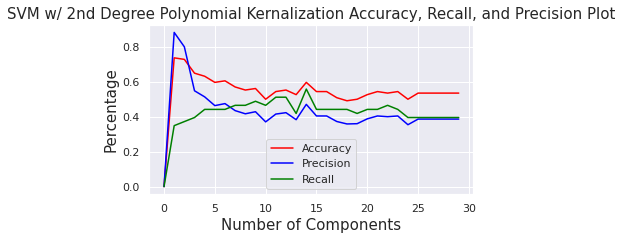

In [44]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x = np.array(range(0,30))
y = SVMPv2accuracy
z = SVMPv2Precision
v = SVMPv2Recall
plt.title("SVM w/ 2nd Degree Polynomial Kernalization Accuracy, Recall, and Precision Plot", fontsize = 15)
plt.plot(x, y, color="red", label="Accuracy")
plt.plot(x, z, color="blue", label="Precision")
plt.plot(x, v, color="green", label="Recall")
plt.xlabel('Number of Components', fontsize = 15) 
plt.ylabel('Percentage', fontsize = 15) 
leg = plt.legend(loc = 'lower center')
plt.show()

In [45]:
SVM_Gauss = SVC(kernel = 'rbf', C= 1E3, gamma=0.1)
columns = []
SVMGaussaccuracy = np.zeros(30)
SVMGaussPrecision = np.zeros(30)
SVMGaussRecall = np.zeros(30)
for i in range(1,30):
    pca = PCA(n_components=i)
    columns = np.append(columns, ['principal component ' + str(i)])
    columns = list(columns)
    principalComponentstrain = pca.fit_transform(cancer_X_trainstd) 
    principalDftrain = pd.DataFrame(data = principalComponentstrain, columns = columns)

    finalDftrain = pd.concat([principalDftrain, cancer_dataset[['label']]], axis = 1)
    principalComponentstest = pca.fit_transform(cancer_X_teststd) 
    principalDftest = pd.DataFrame(data = principalComponentstest, columns = columns)
    finalDftest = pd.concat([principalDftest, cancer_dataset[['label']]], axis = 1)
    SVM_Gauss_train = SVM_Gauss.fit(principalDftrain.values, cancer_Y_train)
    cancer_Y_predSVMGauss = SVM_Gauss_train.predict(principalDftest.values)
    print("Accuracy " + str(i) + ":",metrics.accuracy_score(cancer_Y_test, cancer_Y_predSVMGauss))
    SVMGaussaccuracy[i] = metrics.accuracy_score(cancer_Y_test, cancer_Y_predSVMGauss)
    print("Precision " + str(i) + ":", metrics.precision_score(cancer_Y_test, cancer_Y_predSVMGauss, pos_label="Benign"))
    SVMGaussPrecision[i] = metrics.precision_score(cancer_Y_test, cancer_Y_predSVMGauss, pos_label="Benign")
    print("Recall " + str(i) + ":",metrics.recall_score(cancer_Y_test, cancer_Y_predSVMGauss, pos_label="Benign"))
    SVMGaussRecall[i] = metrics.recall_score(cancer_Y_test, cancer_Y_predSVMGauss, pos_label="Benign")

Accuracy 1: 0.9385964912280702
Precision 1: 0.9736842105263158
Recall 1: 0.8604651162790697
Accuracy 2: 0.956140350877193
Precision 2: 0.975
Recall 2: 0.9069767441860465
Accuracy 3: 0.9035087719298246
Precision 3: 0.8809523809523809
Recall 3: 0.8604651162790697
Accuracy 4: 0.8508771929824561
Precision 4: 0.7407407407407407
Recall 4: 0.9302325581395349
Accuracy 5: 0.868421052631579
Precision 5: 0.7916666666666666
Recall 5: 0.8837209302325582
Accuracy 6: 0.8859649122807017
Precision 6: 0.7884615384615384
Recall 6: 0.9534883720930233
Accuracy 7: 0.8508771929824561
Precision 7: 0.75
Recall 7: 0.9069767441860465
Accuracy 8: 0.8421052631578947
Precision 8: 0.7358490566037735
Recall 8: 0.9069767441860465
Accuracy 9: 0.8947368421052632
Precision 9: 0.8297872340425532
Recall 9: 0.9069767441860465
Accuracy 10: 0.8771929824561403
Precision 10: 0.7959183673469388
Recall 10: 0.9069767441860465
Accuracy 11: 0.8859649122807017
Precision 11: 0.8
Recall 11: 0.9302325581395349
Accuracy 12: 0.89473684210

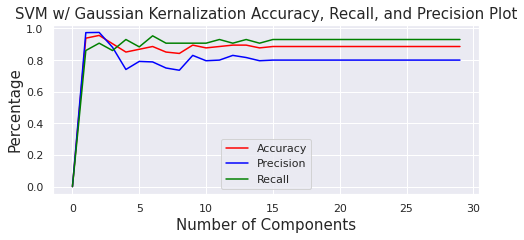

In [46]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x = np.array(range(0,30))
y = SVMGaussaccuracy
z = SVMGaussPrecision
v = SVMGaussRecall
plt.title("SVM w/ Gaussian Kernalization Accuracy, Recall, and Precision Plot", fontsize = 15)
plt.plot(x, y, color="red", label="Accuracy")
plt.plot(x, z, color="blue", label="Precision")
plt.plot(x, v, color="green", label="Recall")
plt.xlabel('Number of Components', fontsize = 15) 
plt.ylabel('Percentage', fontsize = 15) 
leg = plt.legend(loc = 'lower center')
plt.show()

In [47]:
SVM_Sigmoid = SVC(kernel = 'sigmoid', C= 1E3)
columns = []
SVMSigaccuracy = np.zeros(30)
SVMSigPrecision = np.zeros(30)
SVMSigRecall = np.zeros(30)
for i in range(1,30):
    pca = PCA(n_components=i)
    columns = np.append(columns, ['principal component ' + str(i)])
    columns = list(columns)
    principalComponentstrain = pca.fit_transform(cancer_X_trainstd) 
    principalDftrain = pd.DataFrame(data = principalComponentstrain, columns = columns)

    finalDftrain = pd.concat([principalDftrain, cancer_dataset[['label']]], axis = 1)
    principalComponentstest = pca.fit_transform(cancer_X_teststd) 
    principalDftest = pd.DataFrame(data = principalComponentstest, columns = columns)
    finalDftest = pd.concat([principalDftest, cancer_dataset[['label']]], axis = 1)
    SVM_Sig_train = SVM_Sigmoid.fit(principalDftrain.values, cancer_Y_train)
    cancer_Y_predSVMSig = SVM_Sig_train.predict(principalDftest.values)
    print("Accuracy " + str(i) + ":",metrics.accuracy_score(cancer_Y_test, cancer_Y_predSVMSig))
    SVMSigaccuracy[i] = metrics.accuracy_score(cancer_Y_test, cancer_Y_predSVMSig)
    print("Precision " + str(i) + ":", metrics.precision_score(cancer_Y_test, cancer_Y_predSVMSig, pos_label="Benign"))
    SVMSigPrecision[i] = metrics.precision_score(cancer_Y_test, cancer_Y_predSVMSig, pos_label="Benign")
    print("Recall " + str(i) + ":",metrics.recall_score(cancer_Y_test, cancer_Y_predSVMSig, pos_label="Benign"))
    SVMSigRecall[i] = metrics.recall_score(cancer_Y_test, cancer_Y_predSVMSig, pos_label="Benign")
    columns = np.array(columns)

Accuracy 1: 0.9298245614035088
Precision 1: 0.926829268292683
Recall 1: 0.8837209302325582
Accuracy 2: 0.9649122807017544
Precision 2: 0.975609756097561
Recall 2: 0.9302325581395349
Accuracy 3: 0.9210526315789473
Precision 3: 0.9047619047619048
Recall 3: 0.8837209302325582
Accuracy 4: 0.956140350877193
Precision 4: 0.9318181818181818
Recall 4: 0.9534883720930233
Accuracy 5: 0.9122807017543859
Precision 5: 0.851063829787234
Recall 5: 0.9302325581395349
Accuracy 6: 0.9122807017543859
Precision 6: 0.851063829787234
Recall 6: 0.9302325581395349
Accuracy 7: 0.9210526315789473
Precision 7: 0.8541666666666666
Recall 7: 0.9534883720930233
Accuracy 8: 0.9122807017543859
Precision 8: 0.8367346938775511
Recall 8: 0.9534883720930233
Accuracy 9: 0.9122807017543859
Precision 9: 0.851063829787234
Recall 9: 0.9302325581395349
Accuracy 10: 0.9122807017543859
Precision 10: 0.8367346938775511
Recall 10: 0.9534883720930233
Accuracy 11: 0.8771929824561403
Precision 11: 0.8222222222222222
Recall 11: 0.86046

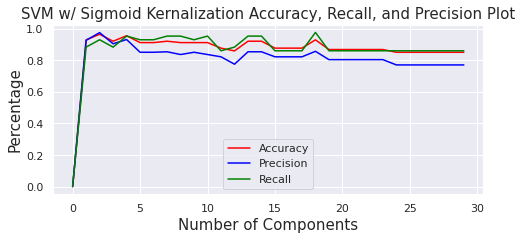

In [48]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x = np.array(range(0,30))
y = SVMSigaccuracy
z = SVMSigPrecision
v = SVMSigRecall
plt.title("SVM w/ Sigmoid Kernalization Accuracy, Recall, and Precision Plot", fontsize = 15)
plt.plot(x, y, color="red", label="Accuracy")
plt.plot(x, z, color="blue", label="Precision")
plt.plot(x, v, color="green", label="Recall")
plt.xlabel('Number of Components', fontsize = 15) 
plt.ylabel('Percentage', fontsize = 15) 
leg = plt.legend(loc = 'lower center')
plt.show()

Problem 2

In [49]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

url= 'https://raw.githubusercontent.com/jasanchez19/Machine-Learning-SVM-and-SVR-models/main/Housing.csv'

df=pd.read_csv(url)
df.shape

(545, 13)

In [50]:
df['mainroad'].replace('yes', 1, inplace=True)
df['mainroad'].replace('no', 0, inplace=True)
df['guestroom'].replace('yes', 1, inplace=True)
df['guestroom'].replace('no', 0, inplace=True)
df['basement'].replace('yes', 1, inplace=True)
df['basement'].replace('no', 0, inplace=True)
df['hotwaterheating'].replace('yes', 1, inplace=True)
df['hotwaterheating'].replace('no', 0, inplace=True)
df['airconditioning'].replace('yes', 1, inplace=True)
df['airconditioning'].replace('no', 0, inplace=True)
df['prefarea'].replace('yes', 1, inplace=True)
df['prefarea'].replace('no', 0, inplace=True)
Housing_X = df.iloc[:,1:12].values
Housing_Y = df.iloc[:,0].values

Housing_X_train, Housing_X_test, Housing_Y_train, Housing_Y_test = train_test_split(Housing_X, Housing_Y, test_size=0.2, random_state=42)

Housing_X_trainstd = sc_X.fit_transform(Housing_X_train)
Housing_X_teststd = sc_X.transform(Housing_X_test)

In [51]:
SVR_Linear = SVR(kernel = 'linear', C= 1E6)
columns = []
SVRLinearScore = np.zeros(12)
for i in range(1,12):
    pca = PCA(n_components=i)
    columns = np.append(columns, ['principal component ' + str(i)])
    columns = list(columns)
    principalComponentstrain = pca.fit_transform(Housing_X_trainstd) 
    principalDftrain = pd.DataFrame(data = principalComponentstrain, columns = columns)

    finalDftrain = pd.concat([principalDftrain, df[['price']]], axis = 1)
    principalComponentstest = pca.fit_transform(Housing_X_teststd) 
    principalDftest = pd.DataFrame(data = principalComponentstest, columns = columns)
    finalDftest = pd.concat([principalDftest, df[['price']]], axis = 1)
    SVR_Linear_train = SVR_Linear.fit(principalDftrain.values, Housing_Y_train)
    Housing_Y_predSVRLIN = SVR_Linear_train.predict(principalDftest.values)
    print("R2 score " + str(i) + ": %.2f" % r2_score(Housing_Y_test,Housing_Y_predSVRLIN))
    print("Mean squared error " + str(i) + ": %.2f" % mean_squared_error(Housing_Y_test,Housing_Y_predSVRLIN))
    SVRLinearScore[i] = r2_score(Housing_Y_test,Housing_Y_predSVRLIN)
    columns = np.array(columns)

R2 score 1: 0.56
Mean squared error 1: 2238881202198.31
R2 score 2: 0.55
Mean squared error 2: 2296335812511.53
R2 score 3: 0.55
Mean squared error 3: 2282017195331.10
R2 score 4: 0.55
Mean squared error 4: 2271997022519.79
R2 score 5: 0.55
Mean squared error 5: 2273574297651.74
R2 score 6: 0.55
Mean squared error 6: 2274676181180.87
R2 score 7: 0.55
Mean squared error 7: 2276371912771.96
R2 score 8: 0.56
Mean squared error 8: 2249245183784.53
R2 score 9: 0.54
Mean squared error 9: 2307629649256.35
R2 score 10: 0.54
Mean squared error 10: 2334426249272.29
R2 score 11: 0.53
Mean squared error 11: 2350955215620.12


In [52]:
SVR_Poly = SVR(kernel = 'poly', C= 1E6, degree = 2)
columns = []
SVRPolyScore = np.zeros(12)
for i in range(1,12):
    pca = PCA(n_components=i)
    columns = np.append(columns, ['principal component ' + str(i)])
    columns = list(columns)
    principalComponentstrain = pca.fit_transform(Housing_X_trainstd) 
    principalDftrain = pd.DataFrame(data = principalComponentstrain, columns = columns)

    finalDftrain = pd.concat([principalDftrain, df[['price']]], axis = 1)
    principalComponentstest = pca.fit_transform(Housing_X_teststd) 
    principalDftest = pd.DataFrame(data = principalComponentstest, columns = columns)
    finalDftest = pd.concat([principalDftest, df[['price']]], axis = 1)
    SVR_Poly_train = SVR_Poly.fit(principalDftrain.values, Housing_Y_train)
    Housing_Y_predSVRPoly = SVR_Poly_train.predict(principalDftest.values)
    print("R2 score " + str(i) + ": %.2f" % r2_score(Housing_Y_test,Housing_Y_predSVRPoly))
    print("Mean squared error " + str(i) + ": %.2f" % mean_squared_error(Housing_Y_test,Housing_Y_predSVRPoly))
    SVRPolyScore[i] = r2_score(Housing_Y_test,Housing_Y_predSVRPoly)
    columns = np.array(columns)

R2 score 1: 0.14
Mean squared error 1: 4369157823847.71
R2 score 2: -0.07
Mean squared error 2: 5383370577541.46
R2 score 3: -0.13
Mean squared error 3: 5710503290964.85
R2 score 4: -0.08
Mean squared error 4: 5460807873207.97
R2 score 5: -0.00
Mean squared error 5: 5078022407061.41
R2 score 6: -0.04
Mean squared error 6: 5266521633902.17
R2 score 7: -0.02
Mean squared error 7: 5176631130411.15
R2 score 8: 0.03
Mean squared error 8: 4882639710705.89
R2 score 9: -0.03
Mean squared error 9: 5190623496197.98
R2 score 10: 0.01
Mean squared error 10: 5007438644277.82
R2 score 11: 0.00
Mean squared error 11: 5048217034521.86


In [53]:
SVR_Gauss = SVR(kernel = 'rbf', C= 1E6, gamma = 0.1)
columns = []
SVRGaussScore = np.zeros(12)

for i in range(1,12):
    pca = PCA(n_components=i)
    columns = np.append(columns, ['principal component ' + str(i)])
    columns = list(columns)
    principalComponentstrain = pca.fit_transform(Housing_X_trainstd) 
    principalDftrain = pd.DataFrame(data = principalComponentstrain, columns = columns)

    finalDftrain = pd.concat([principalDftrain, df[['price']]], axis = 1)
    principalComponentstest = pca.fit_transform(Housing_X_teststd) 
    principalDftest = pd.DataFrame(data = principalComponentstest, columns = columns)
    finalDftest = pd.concat([principalDftest, df[['price']]], axis = 1)
    SVR_Gauss_train = SVR_Gauss.fit(principalDftrain.values, Housing_Y_train)
    Housing_Y_predSVRGauss = SVR_Gauss_train.predict(principalDftest.values)
    print("R2 score " + str(i) + ": %.2f" % r2_score(Housing_Y_test,Housing_Y_predSVRGauss))
    print("Mean squared error " + str(i) + ": %.2f" % mean_squared_error(Housing_Y_test,Housing_Y_predSVRGauss))
    SVRGaussScore[i] = r2_score(Housing_Y_test,Housing_Y_predSVRGauss)
    columns = np.array(columns)

R2 score 1: 0.57
Mean squared error 1: 2195800513262.85
R2 score 2: 0.51
Mean squared error 2: 2480445117858.80
R2 score 3: 0.51
Mean squared error 3: 2473801947794.55
R2 score 4: 0.50
Mean squared error 4: 2543365908277.50
R2 score 5: 0.48
Mean squared error 5: 2634077432381.64
R2 score 6: 0.48
Mean squared error 6: 2619696334720.26
R2 score 7: 0.51
Mean squared error 7: 2472573023678.89
R2 score 8: 0.53
Mean squared error 8: 2385783600969.22
R2 score 9: 0.50
Mean squared error 9: 2521389452555.93
R2 score 10: 0.51
Mean squared error 10: 2482085935229.42
R2 score 11: 0.48
Mean squared error 11: 2644447125206.12


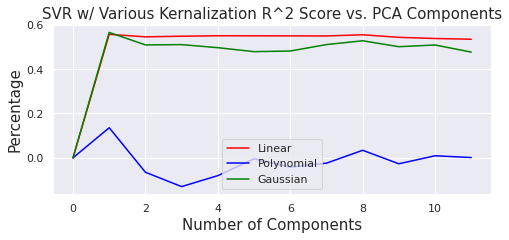

In [54]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x = np.array(range(0,12))
y = SVRLinearScore
z = SVRPolyScore
v = SVRGaussScore
plt.title("SVR w/ Various Kernalization R^2 Score vs. PCA Components", fontsize = 15)
plt.plot(x, y, color="red", label="Linear")
plt.plot(x, z, color="blue", label="Polynomial")
plt.plot(x, v, color="green", label="Gaussian")
plt.xlabel('Number of Components', fontsize = 15) 
plt.ylabel('Percentage', fontsize = 15) 
leg = plt.legend(loc = 'lower center')
plt.show()